### Import relevant libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

### Load the data

In [4]:
data= pd.read_csv('3.12. Example.csv')
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


### Plot the data

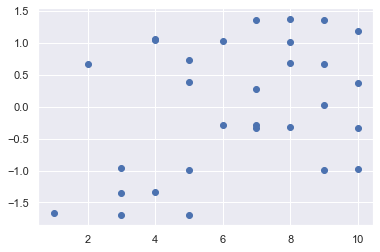

In [7]:
plt.scatter(data['Satisfaction'],data['Loyalty'])
plt.show()

### select the features

In [8]:
x=data.copy()

### Clustering

In [9]:
kmeans= KMeans(2)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Clustering results

In [10]:
clusters=x.copy()

In [12]:
clusters['clusters']= kmeans.fit_predict(x)


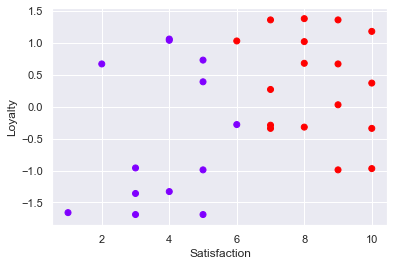

In [18]:
plt.scatter(clusters['Satisfaction'],clusters['Loyalty'],c=clusters['clusters'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

### Standarize the variables

In [21]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

### Take the advantage of the elbow method

In [30]:
def Elbow(x,n):
    
    wcss=[]
    for i in range(1,n):
        kmeans= KMeans(i)
        kmeans.fit(x)
        wcss_iter= kmeans.inertia_
        wcss.append(wcss_iter)
    number_clusters = [a for a in range(1,n)]
    plt.plot(number_clusters,wcss)
    plt.title('Elbow')
    plt.xlabel('number of clusters',fontsize='20')
    plt.ylabel('wcss',fontsize='20')
    plt.xlim(0,n)
    plt.show()
    

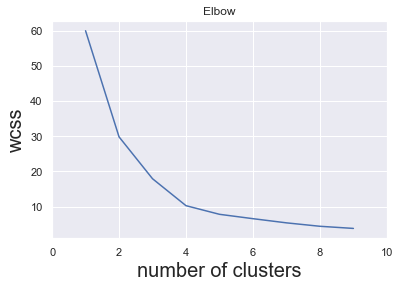

In [85]:
Elbow(x_scaled,10)

### Exploring cluster solutions and select the optimum number of clusters

In [94]:
kmeans = KMeans(3)
kmeans.fit(x_scaled)
cluster_new= x.copy()
cluster_new['cluster_pred']= kmeans.fit_predict(x_scaled)
cluster_new

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,1
1,6,-0.28,0
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,2
5,1,-1.66,1
6,10,-0.97,0
7,8,-0.32,0
8,8,1.02,0
9,8,0.68,0


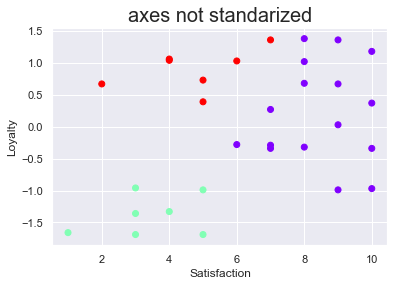

In [95]:
plt.scatter(cluster_new['Satisfaction'],cluster_new['Loyalty'],c= cluster_new['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.title('axes not standarized',fontsize=20)
plt.show()

### drawing again with axes standarized

In [80]:
x_frame

,Satisfaction,Loyalty,cluster_pred
0,-0.931381,-1.331811,1
1,-0.155230,-0.281171,0
2,-0.543305,-0.991604,1
3,0.232845,-0.291177,0
4,-0.931381,1.059645,0
5,-2.095606,-1.662012,1
6,1.397071,-0.971592,0
7,0.620920,-0.321196,0
8,0.620920,1.019621,0
9,0.620920,0.679414,0


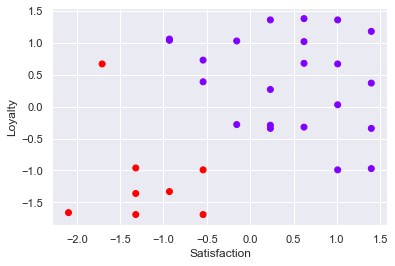

In [76]:
kmeans = KMeans(2)
kmeans.fit(x_scaled)
a=x_scaled[:,0:1].reshape(30,)
b=x_scaled[:,1:2].reshape(30,)
x_frame = pd.DataFrame()
x_frame['Satisfaction']= a
x_frame['Loyalty']= b
x_frame['cluster_pred']= kmeans.fit_predict(x_scaled)
plt.scatter(a,b,c= x_frame['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()